## Data Analysis Script

In [35]:
import pandas as pd
import numpy as np
import graphviz

### Import Clean Data

In [18]:
crime_df = pd.read_csv("../data/crime_1617_clean_data.csv")
crime_df.head()

,Unnamed: 0,X,ID,Case.Number,Date,Block,IUCR,Primary.Type,Description,Location.Description,...,FBI.Code,X.Coordinate,Y.Coordinate,Year,Updated.On,Latitude,Longitude,Location,Crime_Date,Crime_Time
0,1,3,10508693,HZ250496,2016-05-03 23:40:00,013XX S SAWYER AVE,0486,SEXUAL ASSAULT,DOMESTIC BATTERY SIMPLE,APARTMENT,...,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)",2016-05-03,23:40:00
1,2,89,10508695,HZ250409,2016-05-03 21:40:00,061XX S DREXEL AVE,0486,SEXUAL ASSAULT,DOMESTIC BATTERY SIMPLE,RESIDENCE,...,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)",2016-05-03,21:40:00
2,3,197,10508697,HZ250503,2016-05-03 23:31:00,053XX W CHICAGO AVE,0470,PUBLIC INDECENCY,RECKLESS CONDUCT,STREET,...,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)",2016-05-03,23:31:00
3,4,673,10508698,HZ250424,2016-05-03 22:10:00,049XX W FULTON ST,0460,SEXUAL ASSAULT,SIMPLE,SIDEWALK,...,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)",2016-05-03,22:10:00
4,5,911,10508699,HZ250455,2016-05-03 22:00:00,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,...,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)",2016-05-03,22:00:00


### Modify Data Types

To fit the decision tree model, we need to modify the columns `Primary.Type`, `Location.Descriptions` into float format.

In [28]:
#column Primary.Type
pt2 = crime_df[['Primary.Type']]
crime_pt2_count = pd.DataFrame(pt2.groupby('Primary.Type').size().sort_values(ascending=False).rename('Count').reset_index())
pt_ref = crime_pt2_count['Primary.Type'].values.tolist()
crime_df['Primary.Type.Num'] = crime_df['Primary.Type'].apply(lambda x: pt_ref.index(x))

#column Location.Description
loc = crime_df[['Location.Description']]
crime_loc_count = pd.DataFrame(loc.groupby('Location.Description').size().sort_values(ascending=False).rename('Count').reset_index())
loc_ref = crime_loc_count['Location.Description'].values.tolist()
crime_df['Location.Description.Num'] = crime_df['Location.Description'].apply(lambda x: loc_ref.index(x))

crime_df.head()

,Unnamed: 0,X,ID,Case.Number,Date,Block,IUCR,Primary.Type,Description,Location.Description,...,Y.Coordinate,Year,Updated.On,Latitude,Longitude,Location,Crime_Date,Crime_Time,Primary.Type.Num,Location.Description.Num
0,1,3,10508693,HZ250496,2016-05-03 23:40:00,013XX S SAWYER AVE,0486,SEXUAL ASSAULT,DOMESTIC BATTERY SIMPLE,APARTMENT,...,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)",2016-05-03,23:40:00,1,2
1,2,89,10508695,HZ250409,2016-05-03 21:40:00,061XX S DREXEL AVE,0486,SEXUAL ASSAULT,DOMESTIC BATTERY SIMPLE,RESIDENCE,...,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)",2016-05-03,21:40:00,1,1
2,3,197,10508697,HZ250503,2016-05-03 23:31:00,053XX W CHICAGO AVE,0470,PUBLIC INDECENCY,RECKLESS CONDUCT,STREET,...,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)",2016-05-03,23:31:00,10,0
3,4,673,10508698,HZ250424,2016-05-03 22:10:00,049XX W FULTON ST,0460,SEXUAL ASSAULT,SIMPLE,SIDEWALK,...,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)",2016-05-03,22:10:00,1,3
4,5,911,10508699,HZ250455,2016-05-03 22:00:00,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,...,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)",2016-05-03,22:00:00,0,1


### Decision Tree Model

In [48]:
from sklearn.model_selection import train_test_split
from sklearn import tree

#fit a decision tree model using sklearn
model = tree.DecisionTreeClassifier(max_depth=5)
feature_cols = ['Primary.Type.Num','Location.Description.Num','Domestic','Latitude','Longitude']
X = crime_df.loc[:,feature_cols]
y = crime_df.Arrest

#split the train and test sets (7:3)
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state = 48)

#fit the model
model.fit(Xtrain,ytrain)

#prediction
predictions = model.predict(Xtest)
#prediction summary
pred_dict = Xtest.copy()
pred_dict['Target'] = ytest
pred_dict['Prediction'] = predictions

pd.DataFrame(pred_dict).head()

,Primary.Type.Num,Location.Description.Num,Domestic,Latitude,Longitude,Target,Prediction
162071,13,9,0,41.663250,-87.635724,0,1
249107,0,0,0,41.895531,-87.708924,0,0
73115,3,0,0,41.852515,-87.715025,1,0
43672,7,4,0,42.010229,-87.672727,1,1
239751,0,16,0,41.821346,-87.704491,0,0


### Cross Validation
we use the 10-fold cross validation

In [49]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(model, Xtest, ytest, cv=10))

0.8725624847631595

### Model Visualization

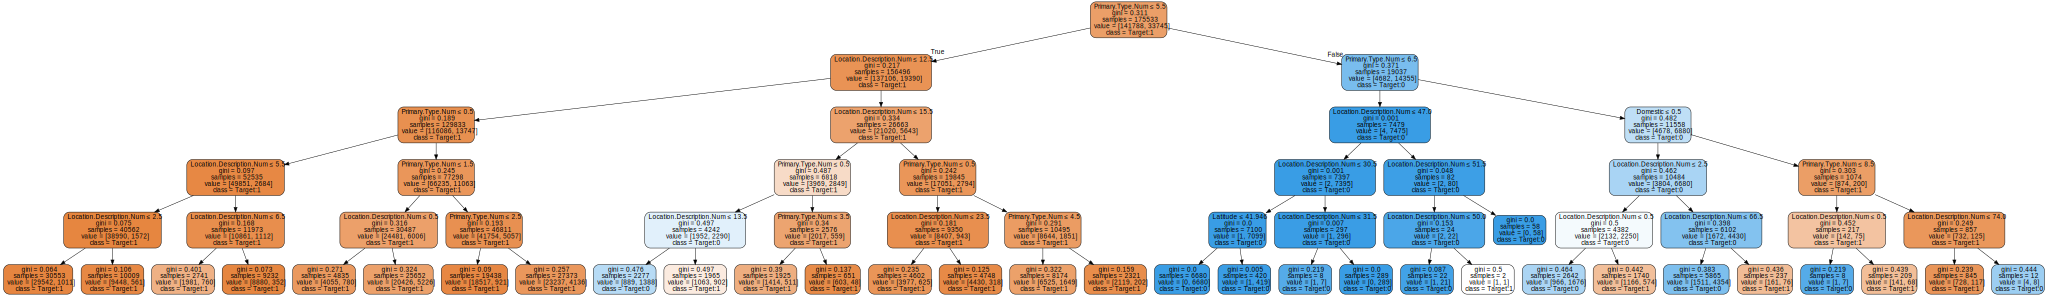

In [50]:
from sklearn.tree import export_graphviz
#define a function to store the decision tree in the project folder
def save_and_show_decision_tree(model, 
                                class_names = ['Target:1', 'Target:0'], 
                                save_file_prefix = '../img/Crime_Tree', **kwargs):
    """
    Saves the decision tree model as a pdf and a 
    """
    dot_data = tree.export_graphviz(model, out_file=None, 
                             feature_names=feature_cols,  
                             class_names=class_names,  
                             filled=True, rounded=True,  
                             special_characters=True, **kwargs)  

    graph = graphviz.Source(dot_data) 
    graph.render(save_file_prefix) 
    return graph


#feature_cols=Xtrain.columns.values.tolist()
crime_tree = save_and_show_decision_tree(model)
crime_tree

In [47]:
feat_importance = model.tree_.compute_feature_importances(normalize=False)
print(feat_importance)

[0.10238147 0.01957934 0.00311108 0.00381064 0.00334403]
